# Garmin Sleep, Activity and Health Data Analysis

<p>In mid-2021 I purchased a Garmin smart watch which I used to track my sleep, activities and health statistics. After wearing the watch for a few years I still have not done a deep dive into all of this potentially useful data I have been collecting about myself. Therefore, I decided to obtain all of my health data from <a href="https://support.garmin.com/en-US/?faq=W1TvTPW8JZ6LfJSfK512Q8">Garmin</a>, with the purpose of finding any interesting correlations between my sleep, health and activity statistics that I could use to help myself be healthier.</p>

<p><img style="float: right; margin:5px 20px 5px 1px; max-width:350px" src="https://logos-world.net/wp-content/uploads/2020/12/Garmin-Emblem.png"></p>

## Summary of Contents

1. [Introduction](#Introduction)
2. [Data Import, Inspection and Cleaning](#2.-Data-Import,-Inspection-and-Cleaning)
3. [Analysis and Answers to Questions](#3.-Analysis-and-Answers-to-Questions)
4. [Conclusions and Discussion](#4.-Conclusions-and-Discussion)
5. [Future Analysis](#5.-Future-Analysis)
6. [References](#6.-References)

## 1. Introduction

Mindfulness has become increasingly prevalent in society, especially during the pandemic. Google searches for the term "mindfulness" have seen a significant increase during this period (Kwon, 2023). Personally, I've found mindfulness and physical health to be incredibly important since 2020. This shift in perspective led me to seek ways to improve my overall well-being. During my research, I came across "Why We Sleep" by Matthew Walker, which underscores the vital importance of sleep in maintaining both mental and physical health. According to Walker, "Sleep is the single most effective thing we can do to reset our brain and body health each day." (Walker, 2018).

In 2020, I began focusing more on promoting my mental and physical health. In July 2021, I purchased a Garmin health tracking watch and used it to track various activities, primarily running but also swimming and hiking, as well as my sleep patterns. While the Garmin app provides detailed statistics for the previous 7 days, it lacks long-term trends and potential correlations between good sleep and other activity and health metrics to tell me what works in obtaining a good night's sleep.

**Therefore, the primary purpose of this analysis is to explore whether any activities or health statistics tracked by my Garmin watch may contribute to better sleep quality (longer sleep).**

For this analysis, I requested and was provided with my detailed health data from the <a href="https://support.garmin.com/en-US/?faq=W1TvTPW8JZ6LfJSfK512Q8">Garmin website</a>. There was huge swath of various data tables provided in various formats, but I sifted through and decided to use the following three categories of data files (which totaled 20x json files and 1 csv file):

### Brief Description of Each Data File:

- **Activities ('activities.csv'):**
  - This contains all activities I recorded using my Garmin watch. The vast majority are runs, although there are some swims and walks recorded.
  - 40 columns
  - 1 row per date and activity that was recorded using my Garmin watch.
  - Most useful columns: 'Date' (date), 'Activity Type' (string), 'Distance' (float64), 'Time' (float64), 'Max HR' (int64)

- **Metrics Data ('metrics_A.json', 'metrics_B.json', ... 'metrics_J.json'):**
  - This contains all health metrics data (including heart rate, stress levels and daily step count) recorded while wearing my watch throughout the day and night.
  - 51 columns, 978 entries.
  - 1 row per date that health data was recorded using my Garmin watch.
  - Most useful columns: 'calendarDate' (date), 'highlyActiveSeconds' (int64), 'totalSteps' (int64), 'totalKilocalories' (int64), 'totalDistanceMeters' (float64), 'floorsAscendedInMeters' (float64), 'maxAvgHeartRate' (float64), allDayStress (dictionary)

- **Sleep Data ('sleepdata_A.json', 'sleepdata_B.json', ... 'sleepdata_J.json'):**
  - This contains all sleep data recorded while wearing my watch at night when I slept.
  - 13 columns, 978 entries.
  - 1 row per date that sleep was recorded using my Garmin watch.
  - Most useful columns: 'calendarDate' (date), 'deepSleepSeconds' (float64), 'lightSleepSeconds' (float64), 'remSleepSeconds' (float64)
 
### Caveats:
- I got a new Garmin watch in September 2022, about 2 years after I obtained my first Garmin watch. I noticed that some of the health stats (like heart rate and stress levels) were inconsistent with the previous watch. Therefore, I limited this analysis to the 2yr3mo period that I wore my first watch. This is still plenty of data and more than enough to complete the goal of this analysis.
- The quality of the data depended on me wearing the watch for most of the day, during activities (and recording them) and every night to sleep. Whilst I did this, it is possible that some nights of sleep and some (although very few) activities were missed when the Garmin watch battery went flat.
- Sleep quality can be measured in various ways and can include a check of portions of REM, Deep and Light Sleep. **For the purpose of this analysis, to keep it simple, sleep quality is simply measured by total time asleep per night**.
- Several additional factors may affect sleep outside of those measured by a Garmin watch (such as diet, screen time throughout the day or before bed or personal life matters and events taking place). This analysis does not delve into those factors, it is a high level analysis to determine what physical factors measured in my body throughout the day lead to a longer sleep at night.

### Questions to Answer in this Analysis:
Given the primary purpose of this analysis is to explore whether any activities or health statistics tracked by my Garmin watch may contribute to better sleep quality (longer sleep), the following questions have been proposed:

1.	**As a Base line, was my sleep and activity level healthy over this period?**
    - a.	Was I a good sleeper over this period? What is my average sleep when compared to recommended sleep duration by medical professionals? 
    - b.	Additionally, what was my activity level like over this time period and how does it compare to recommended levels by medical professionals?
2.	**Do I sleep better on days that I exercised? Does getting my heart rate up during the day contribute to a longer sleep?**
3.	**What type of exercise led to the longest sleeps?**
4.	**What activity and health factors during the day lead to a longer sleep at night?**
5.	**Does lower stress during the day contribute to longer sleep too?**


In [436]:
# import libraries required for the analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import datetime

## 2. Data Import, Inspection and Cleaning

### Importing the data
There were three data tables I needed to import, the activities.csv was straightforward, however the metrics and sleep data files came in 10 json files each which meant a function was needed to make the process of importing and concatenating the files into one table more efficient.

In [437]:
#Import Activities data which comes in one csv
activities = pd.read_csv('activities.csv')
activities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Activity Type             345 non-null    object 
 1   Date                      345 non-null    object 
 2   Favorite                  345 non-null    bool   
 3   Title                     345 non-null    object 
 4   Distance                  345 non-null    object 
 5   Calories                  345 non-null    object 
 6   Time                      345 non-null    object 
 7   Avg HR                    345 non-null    int64  
 8   Max HR                    345 non-null    int64  
 9   Aerobic TE                345 non-null    object 
 10  Avg Run Cadence           345 non-null    object 
 11  Max Run Cadence           345 non-null    object 
 12  Avg Pace                  345 non-null    object 
 13  Best Pace                 345 non-null    object 
 14  Total Asce

In [438]:
activities.head(1)

,Activity Type,Date,Favorite,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,...,Min Temp,Surface Interval,Decompression,Best Lap Time,Number of Laps,Max Temp,Moving Time,Elapsed Time,Min Elevation,Max Elevation
0,Running,2/11/2023 7:41,False,Melbourne Running,15.22,"1,050",1:22:01,147,164,3.8,...,0,0:00,No,01:11.3,16,0,1:21:31,1:31:10,-18,35


In [439]:
activities.describe()

,Avg HR,Max HR,Avg Stride Length,Avg Vertical Ratio,Avg Vertical Oscillation,Avg Ground Contact Time,Training Stress Score®,Avg Power,Max Power,Grit,Flow,Avg. Swolf,Avg Stroke Rate,Total Reps,Min Temp,Number of Laps,Max Temp
count,345.000000,345.000000,345.000000,345.0,345.0,345.0,345.0,345.0,345.0,345.0,345.0,345.000000,345.000000,345.0,345.0,345.000000,345.0
mean,149.168116,171.652174,1.299884,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.092754,0.571014,0.0,0.0,9.005797,0.0
std,25.029300,28.272566,0.214690,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.466014,3.712217,0.0,0.0,4.518048,0.0
min,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,3.000000,0.0
25%,148.000000,171.000000,1.300000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,6.000000,0.0
50%,154.000000,177.000000,1.340000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,8.000000,0.0
75%,158.000000,182.000000,1.380000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,10.000000,0.0
max,179.000000,194.000000,1.490000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87.000000,25.000000,0.0,0.0,43.000000,0.0


In [440]:
#To import sleep and metrics data, write a json reading and concatenating function to make the process more efficient.
def jsonread_concat(*args):
    dfs = []
    for json_file in args:
        df = pd.read_json(json_file)
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)
#Use the created function to import the sleep data and concatenate into one table
sleepdata = jsonread_concat('sleepdata_A.json', 'sleepdata_B.json', 'sleepdata_C.json', 'sleepdata_D.json', 'sleepdata_E.json', 'sleepdata_F.json', 'sleepdata_G.json', 'sleepdata_H.json', 'sleepdata_I.json', 'sleepdata_J.json')

# sleepdata.info()
sleepdata.head(1)

,sleepStartTimestampGMT,sleepEndTimestampGMT,calendarDate,sleepWindowConfirmationType,deepSleepSeconds,lightSleepSeconds,remSleepSeconds,awakeSleepSeconds,unmeasurableSeconds,retro,averageRespiration,lowestRespiration,highestRespiration
0,2020-07-01T13:08:00.0,2020-07-01T22:14:00.0,2020-07-02,ENHANCED_CONFIRMED_FINAL,1860.0,19380.0,10620.0,900.0,0.0,False,NaN,NaN,NaN


In [441]:
sleepdata.describe()

,deepSleepSeconds,lightSleepSeconds,remSleepSeconds,awakeSleepSeconds,unmeasurableSeconds,averageRespiration,lowestRespiration,highestRespiration
count,984.000000,984.000000,925.000000,984.000000,984.000000,180.000000,180.000000,180.000000
mean,3966.219512,14145.487805,7403.221622,901.951220,95.000000,12.816667,9.138889,16.683333
std,2757.110762,4524.781989,2457.711514,1129.073231,423.854569,0.543884,1.142202,2.138958
min,0.000000,0.000000,180.000000,0.000000,0.000000,12.000000,6.000000,15.000000
25%,2700.000000,12600.000000,5760.000000,120.000000,0.000000,12.000000,8.000000,16.000000
50%,3720.000000,14760.000000,7620.000000,480.000000,0.000000,13.000000,9.000000,16.000000
75%,4920.000000,16800.000000,9120.000000,1200.000000,0.000000,13.000000,10.000000,17.000000
max,35460.000000,26400.000000,14640.000000,7500.000000,5220.000000,14.000000,12.000000,26.000000


In [442]:
#Use the created function to import the metrics data and concatenate into one table
metrics = jsonread_concat('metrics_A.json', 'metrics_B.json', 'metrics_C.json', 'metrics_D.json', 'metrics_E.json', 'metrics_F.json', 'metrics_G.json', 'metrics_H.json', 'metrics_I.json', 'metrics_J.json')
# metrics.info()
metrics.head(1)

,userProfilePK,calendarDate,uuid,durationInMilliseconds,totalKilocalories,activeKilocalories,bmrKilocalories,wellnessKilocalories,remainingKilocalories,wellnessTotalKilocalories,...,bodyBattery,minAvgHeartRate,maxAvgHeartRate,version,dailyTotalFromEpochData,respiration,restingCaloriesFromActivity,hydration,totalPushes,pushDistance
0,87002459,2020-07-01,12835d9843934c189e99d756a9fe22f8,86400000,2596,513,2083,2596,2596,2596,...,"{'userProfilePK': 87002459, 'calendarDate': '2...",51.0,174.0,73860003,NaN,NaN,NaN,NaN,NaN,NaN


In [443]:
metrics.describe()

,userProfilePK,durationInMilliseconds,totalKilocalories,activeKilocalories,bmrKilocalories,wellnessKilocalories,remainingKilocalories,wellnessTotalKilocalories,wellnessActiveKilocalories,totalSteps,...,currentDayRestingHeartRate,restingHeartRateTimestamp,source,minAvgHeartRate,maxAvgHeartRate,version,dailyTotalFromEpochData,restingCaloriesFromActivity,totalPushes,pushDistance
count,978.0,9.780000e+02,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,...,975.000000,9.750000e+02,978.0,976.000000,976.000000,9.780000e+02,2.0,84.000000,168.0,98.0
mean,87002459.0,8.624190e+07,2606.623722,539.324131,2067.299591,2606.623722,2606.623722,2606.623722,539.324131,8247.049080,...,53.136410,1.635938e+12,0.0,48.121926,136.053279,5.498479e+07,1.0,77.119048,0.0,0.0
std,0.0,4.489309e+06,417.343323,400.008862,107.677716,417.343323,417.343323,417.343323,400.008862,5289.414723,...,3.637143,2.444493e+10,0.0,3.795880,27.725860,2.439773e+07,0.0,56.763386,0.0,0.0
min,87002459.0,3.402000e+07,965.000000,0.000000,820.000000,965.000000,965.000000,965.000000,0.000000,0.000000,...,36.000000,1.593612e+12,0.0,33.000000,86.000000,1.000000e+00,1.0,28.000000,0.0,0.0
25%,87002459.0,8.640000e+07,2312.000000,247.000000,2064.000000,2312.000000,2312.000000,2312.000000,247.000000,4874.500000,...,51.000000,1.614906e+12,0.0,46.000000,113.000000,3.741000e+07,1.0,43.750000,0.0,0.0
50%,87002459.0,8.640000e+07,2515.000000,449.500000,2070.000000,2515.000000,2515.000000,2515.000000,449.500000,7394.500000,...,53.000000,1.635944e+12,0.0,48.000000,128.000000,6.369000e+07,1.0,58.000000,0.0,0.0
75%,87002459.0,8.640000e+07,2804.750000,727.000000,2077.000000,2804.750000,2804.750000,2804.750000,727.000000,10248.000000,...,55.000000,1.657073e+12,0.0,50.000000,166.000000,7.369500e+07,1.0,84.250000,0.0,0.0
max,87002459.0,1.548000e+08,5058.000000,2994.000000,3708.000000,5058.000000,5058.000000,5058.000000,2994.000000,42128.000000,...,70.000000,1.678194e+12,0.0,65.000000,204.000000,8.634000e+07,1.0,371.000000,0.0,0.0


### Clean and merge 
Now that we have three separate dataframes (activities, sleepdata and metrics) we need to add some new fields for analysis, clean up some of the fields and merge the three tables together to get one big (and useful) table for analysis.
Given the three tables all consist of one row per date, we can join the dataframes on their respective date fields so we are analysing the sleep data against the relevant metrics and activity data from the same day.

In [444]:
#Add additional columns to get total sleep time in hours
sleepdata['total_sleep_hourdec'] = ((sleepdata['deepSleepSeconds']+sleepdata['lightSleepSeconds']+sleepdata['remSleepSeconds'])/(60*60)).astype('float')
sleepdata['rem_sleep_hourdec'] = (sleepdata['remSleepSeconds']/(60*60)).astype('float')

In [445]:
# Function to convert date format for Metrics Data
def dfs(dts):
    if pd.isna(dts):
        return pd.NaT  # Return NaT for missing values
    else:
        dt = datetime.datetime.fromtimestamp(int(dts) / 1000).date()
        return dt

# Function to convert date format for Metrics Data (matching the format of 'activities' DataFrame)
def dfs2(dts):
    dt = datetime.datetime.strptime(dts, '%Y-%m-%d').date()
    return dt

# Convert 'date' of activity to the same format as the other data frames which this is to be merged with
activities['date'] = pd.to_datetime(activities['Date']).dt.date

# Convert 'date' columns in metrics
metrics = metrics.rename(columns={'restingHeartRateTimestamp': 'date'})
metrics['date'] = metrics['date'].apply(dfs)
metrics.head()

# Convert 'date' columns in sleepdata
sleepdata = sleepdata.rename(columns={'calendarDate': 'date'})
sleepdata['date'] = sleepdata['date'].apply(dfs2)

In [446]:
#Merge each of the dataframes on the 'date' column and call it slp_met_act
slp_met = pd.merge(sleepdata, metrics, how= 'left', on= 'date')
slp_met_act = pd.merge(slp_met, activities, how= 'left', on= 'date')

#Do any additional cleanup of data (drop na rows and remove rows with sleep outliers [Sleep > 4 hours or < 10 hours] to allow calculations and trends to be determined)
slp_met_act = slp_met_act[slp_met_act['total_sleep_hourdec'].notna() & slp_met_act['maxAvgHeartRate'].notna()& slp_met_act['rem_sleep_hourdec'].notna()]
slp_met_act = slp_met_act.drop(slp_met_act[slp_met_act['total_sleep_hourdec'] > 10].index)
slp_met_act = slp_met_act.drop(slp_met_act[slp_met_act['total_sleep_hourdec'] < 4].index)

#New watch in Sept 2022, so cut off there to avoid differing results
slp_met_act = slp_met_act[pd.to_datetime(slp_met_act['date'])<=  pd.to_datetime('2022-09-01')]


### Final Inspection before analysis
Now that we have all the data from activities, sleepdata and metrics in one useful dataframe (slp_met_act), we can do a final inspection before we ise this for all of our analysis going forward. 
**NOTE**: (For the purpose of saving space, I won't run slp_met_act.info() or .describe() below, but I did these during analysis to confirm the joins and cleaning worked correctly)

In [447]:
slp_met_act.head(1)

,sleepStartTimestampGMT,sleepEndTimestampGMT,date,sleepWindowConfirmationType,deepSleepSeconds,lightSleepSeconds,remSleepSeconds,awakeSleepSeconds,unmeasurableSeconds,retro,...,Min Temp,Surface Interval,Decompression,Best Lap Time,Number of Laps,Max Temp,Moving Time,Elapsed Time,Min Elevation,Max Elevation
0,2020-07-01T13:08:00.0,2020-07-01T22:14:00.0,2020-07-02,ENHANCED_CONFIRMED_FINAL,1860.0,19380.0,10620.0,900.0,0.0,False,...,0.0,0:00,No,00:03.7,9.0,0.0,0:37:34,0:45:17,-36,32


In [448]:
slp_met_act.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 748 entries, 0 to 813
Columns: 105 entries, sleepStartTimestampGMT to Max Elevation
dtypes: bool(1), float64(60), object(44)
memory usage: 614.3+ KB


In [449]:
slp_met_act.describe()

,deepSleepSeconds,lightSleepSeconds,remSleepSeconds,awakeSleepSeconds,unmeasurableSeconds,averageRespiration,lowestRespiration,highestRespiration,total_sleep_hourdec,rem_sleep_hourdec,...,Avg Power,Max Power,Grit,Flow,Avg. Swolf,Avg Stroke Rate,Total Reps,Min Temp,Number of Laps,Max Temp
count,748.000000,748.000000,748.000000,748.000000,748.000000,20.00000,20.000000,20.000000,748.000000,748.000000,...,269.0,269.0,269.0,269.0,269.000000,269.000000,269.0,269.0,269.000000,269.0
mean,3964.331551,14831.951872,7462.139037,995.294118,85.267380,13.15000,9.300000,17.150000,7.294006,2.072816,...,0.0,0.0,0.0,0.0,1.249071,0.643123,0.0,0.0,8.713755,0.0
std,1571.686381,2968.465036,2261.354920,1192.125118,380.350797,0.67082,1.592747,1.899446,1.038486,0.628154,...,0.0,0.0,0.0,0.0,8.077588,3.942563,0.0,0.0,3.923218,0.0
min,0.000000,6120.000000,720.000000,0.000000,0.000000,12.00000,6.000000,15.000000,4.016667,0.200000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,3.000000,0.0
25%,2985.000000,13080.000000,5940.000000,180.000000,0.000000,13.00000,8.750000,16.000000,6.716667,1.650000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,6.000000,0.0
50%,3780.000000,14820.000000,7620.000000,540.000000,0.000000,13.00000,9.000000,16.000000,7.450000,2.116667,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,8.000000,0.0
75%,4920.000000,16620.000000,9120.000000,1320.000000,0.000000,14.00000,10.000000,18.000000,8.000000,2.533333,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,10.000000,0.0
max,11460.000000,26400.000000,12780.000000,7500.000000,5220.000000,14.00000,12.000000,23.000000,9.533333,3.550000,...,0.0,0.0,0.0,0.0,87.000000,25.000000,0.0,0.0,31.000000,0.0


## 3. Analysis and Answers to Questions
### **1.	As a Base line, was my sleep and activity level healthy over this period?**
According to the USA National Heart, Blood and Lung Institute (NIH), experts recommend that adults sleep between 7 and 9 hours a night. (NIH, 2022) 

According to the World Health Organisation (WHO), adults should do at least 150–300 minutes of moderate-intensity aerobic physical activity over a week. This equates to approximately 21-42 minutes per day. (WHO, 2022)

So let's see how I stacked up over the period measured.

### **1a.	Was I a good sleeper over this period? What is my average sleep when compared to recommended sleep duration by medical professionals?** 

Based on the analysis below we see my average sleep per night was **7.31** hours per night. This falls within the expert recommended 7-9 hours as stated above. Additonally, we see that my median was **7.47**, my 1st quartile was **6.73** and my 3rd quartile was **8.01**.

This is also backed up by the graph below which shows my sleep per night, as well as the 30 and 60 day rolling average of sleep per night. This is also a useful graph to show trends over the year that might tell me something about what leads to better sleep. I will come back to this graph later to discuss further.

In [450]:
slp_met_act['total_sleep_hourdec'].describe()

count    748.000000
mean       7.294006
std        1.038486
min        4.016667
25%        6.716667
50%        7.450000
75%        8.000000
max        9.533333
Name: total_sleep_hourdec, dtype: float64

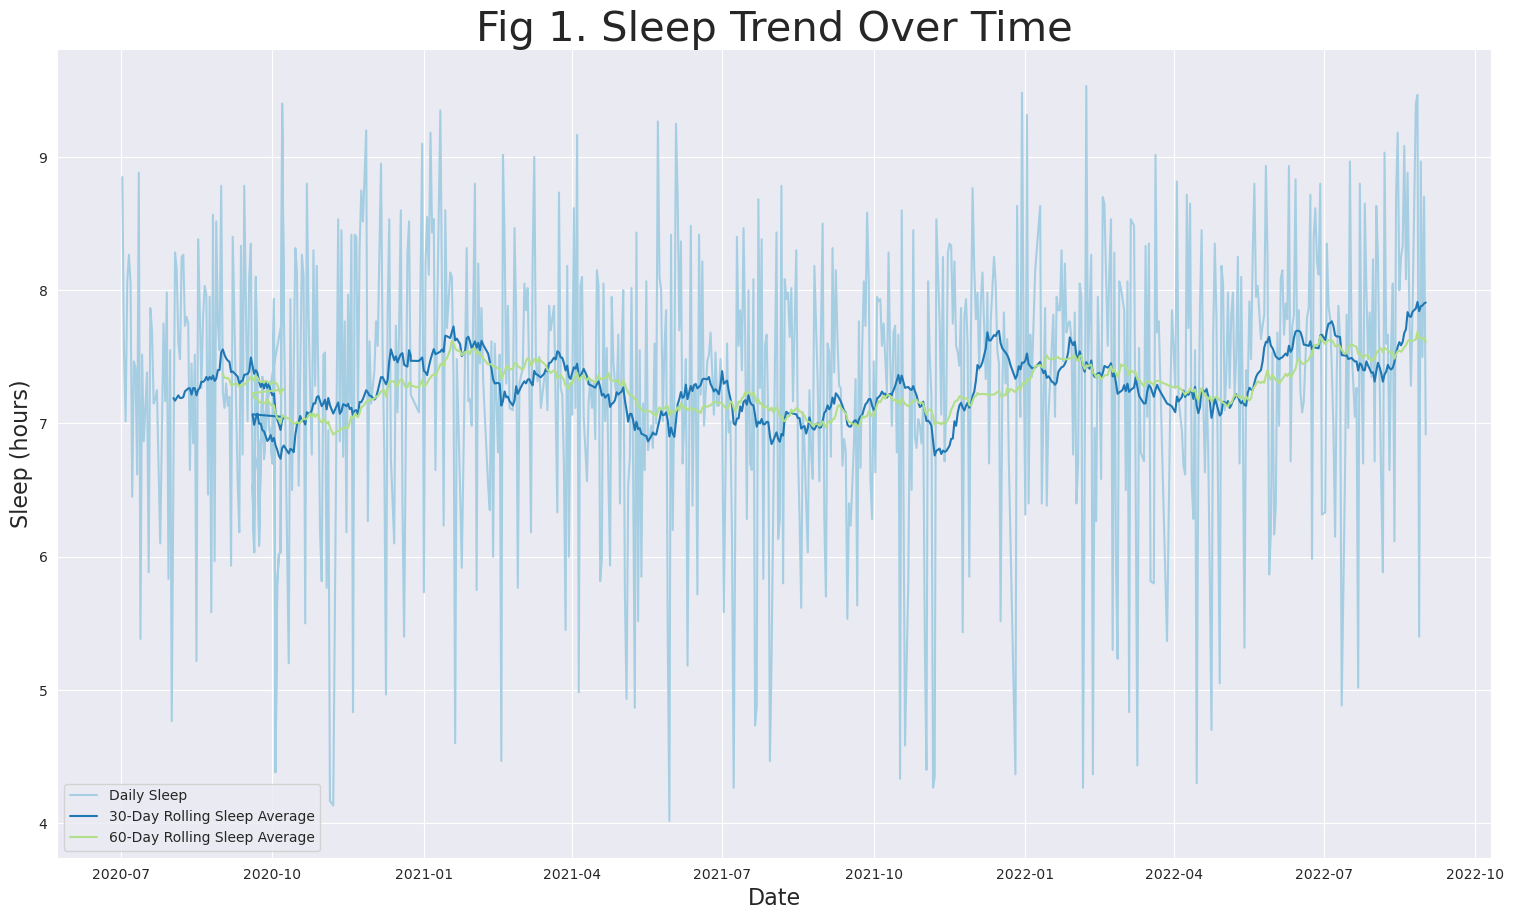

In [451]:
sns.set_palette("Paired")
sns.set_style("darkgrid")

# Find Rolling Averages and add to the data frame
slp_met_act['rolling_sleep_average_30day'] = slp_met_act['total_sleep_hourdec'].rolling(window=30).mean()
slp_met_act['rolling_sleep_average_60day'] = slp_met_act['total_sleep_hourdec'].rolling(window=60).mean()

# Rolling Sleep Plot - set figure and axes
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

# ax1 - Sleep and Rolling sleep average
ax.plot(slp_met_act['date'], slp_met_act['total_sleep_hourdec'], label='Daily Sleep')
ax.plot(slp_met_act['date'], slp_met_act['rolling_sleep_average_30day'], label='30-Day Rolling Sleep Average')
ax.plot(slp_met_act['date'], slp_met_act['rolling_sleep_average_60day'], label='60-Day Rolling Sleep Average')
ax.legend(loc=3)
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('Sleep (hours)', fontsize=16)

# Finalize and show plot
plt.title('Fig 1. Sleep Trend Over Time', fontsize=30)
plt.show()

### **1b.	Additionally, what was my activity level like over this time period and how does it compare to recommended levels by medical professionals?**
Based on the analysis below we see my average activity per day was 5628 seconds or **94 minutes per day**. This far exceeds the expert recommended 21-43 minutes per day as stated above.

We can also see my activity per day in the graph below and a 7 day rolling average of active time per day which visually confirms the above finding.

In [452]:
slp_met_act[['activeSeconds', 'totalDistanceMeters']].describe()

,activeSeconds,totalDistanceMeters
count,748.000000,748.000000
mean,5596.639037,7704.085561
std,3258.009655,5210.786696
min,422.000000,521.000000
25%,3242.250000,3952.500000
50%,4949.500000,6635.000000
75%,7312.500000,10364.500000
max,25081.000000,35270.000000


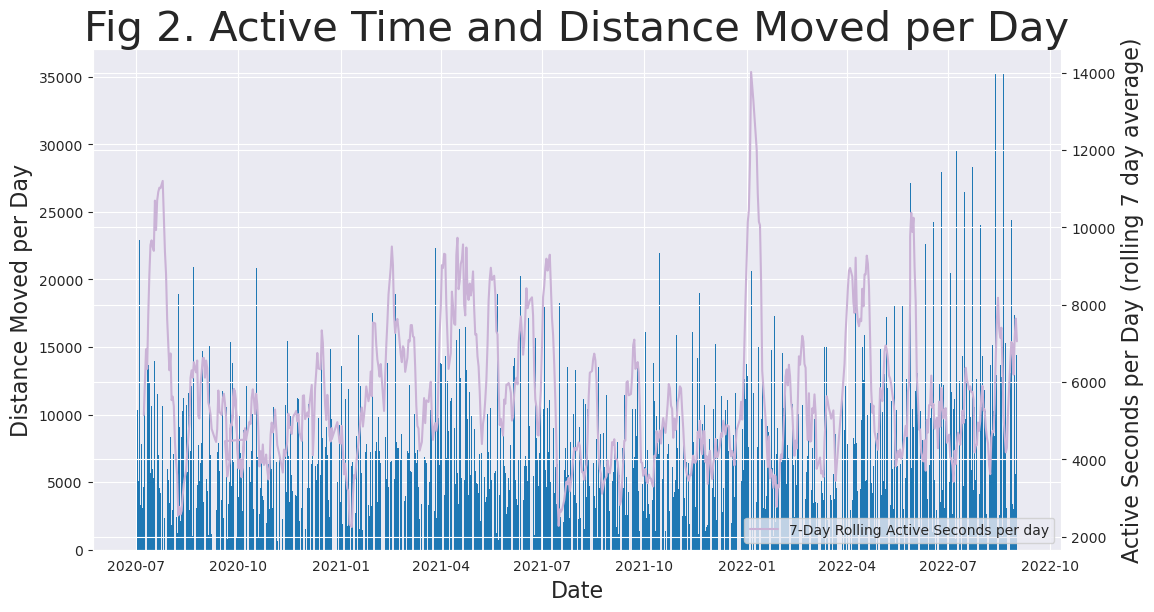

In [453]:
sns.set_palette("Paired")
sns.set_style("darkgrid")

slp_met_act['activeSeconds_7day'] = slp_met_act['activeSeconds'].rolling(window=7).mean()

# Rolling Sleep Plot - set figure and axes
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 6.5)

# ax1 - Sleep and Rolling sleep average
ax.bar(slp_met_act['date'], slp_met_act['totalDistanceMeters'],color='C1', edgecolor='none')
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('Distance Moved per Day', fontsize=16)

# ax2 - 7 day rolling active time
ax2 = ax.twinx()
ax2.plot(slp_met_act['date'], slp_met_act['activeSeconds_7day'], label='7-Day Rolling Active Seconds per day', color="C8")
ax2.set_ylabel('Active Seconds per Day (rolling 7 day average)', fontsize=16)
ax2.legend(loc=4)

# Finalize and show plot
plt.title('Fig 2. Active Time and Distance Moved per Day', fontsize=30)
plt.show()

**Ok, so my sleep and activity was healthy over this period, however we see that my sleep falls at the lower end of the recommended duration window and can probably be improved. Let's into potential factors that affect sleep as measured b the Garmin watch and find out if there's any trends that lead to a better sleep which I can use to help improve in the future.**

### **Q2. Do I sleep better on days that I exercised? Does getting my heart rate up during the day contribute to a longer sleep?**
<p>Let's now look at days where exercise was completed and then, specifically, at days of more intense exercise (i.e. days that the max HR was above 170 bpm) as an added bonus to determine if more intense excercise is even better for sleep.</p>
Looks like I excercised on 262 days out of the 728 days measured during this time period, lets look into whether I slept better on those 262 days.

In [454]:
#Find average sleep for days of activities
slp_met_act['if_active'] = slp_met_act['Distance'].notnull().astype(int)

# Group data by activity status and calculate means for total and REM sleep
avslp_active = slp_met_act.groupby('if_active').agg(
    av_sleep=('total_sleep_hourdec', 'mean'),  # Average total sleep
    av_rem=('rem_sleep_hourdec', 'mean'),      # Average REM sleep
    sleep_count=('total_sleep_hourdec', 'count')  # Count of sleep records
).reset_index()

# View the aggregated sleep statistics
avslp_active.head()

,if_active,av_sleep,av_rem,sleep_count
0,0,7.250661,2.042519,479
1,1,7.371190,2.126766,269


In [455]:
#Find average sleep for days of high average HR
slp_met_act["hr>170"] = np.where(slp_met_act["maxAvgHeartRate"]>=170, "Yes", "No")
avslp_HR = slp_met_act.groupby('hr>170')['total_sleep_hourdec'].mean().reset_index(name='av_sleep')
avslp_HR.head()

,hr>170,av_sleep
0,No,7.276413
1,Yes,7.353824


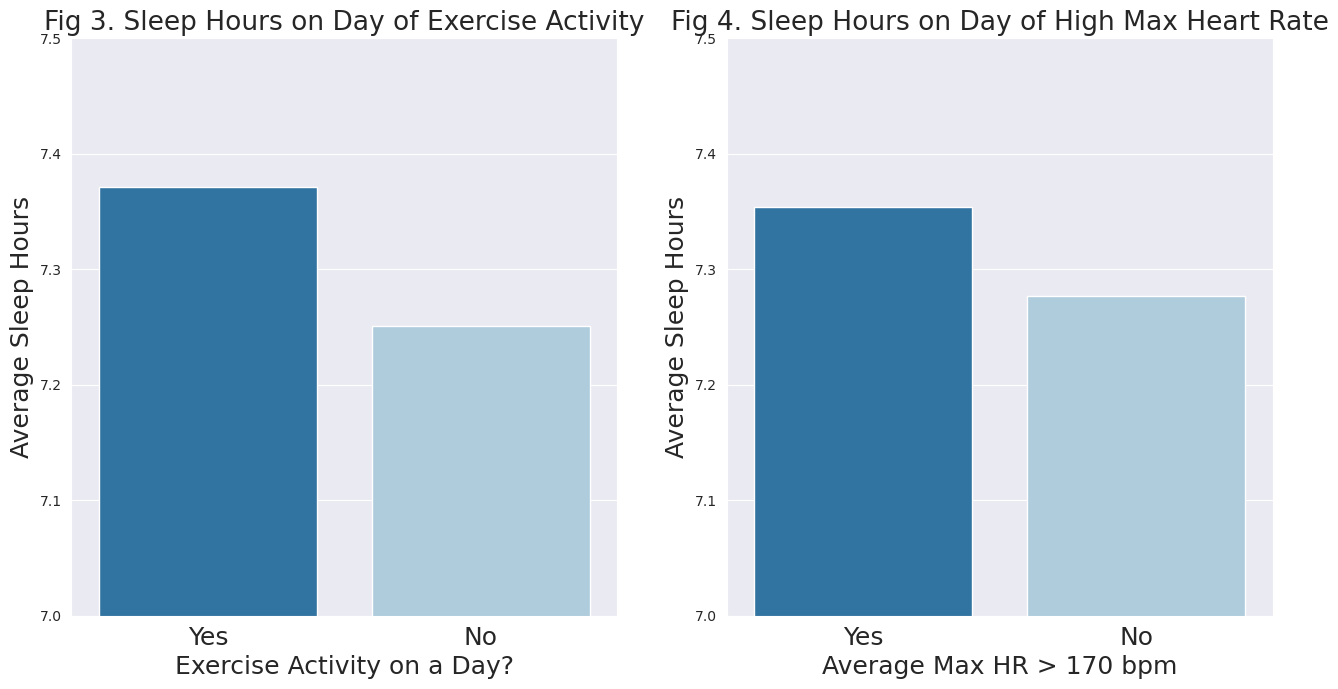

In [456]:
#Set Figure and Axes
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(15.5, 7.5)
sns.set_palette("Paired")


#Plot A
sp1 = sns.barplot(ax=axs[0], x='if_active', y='av_sleep', data = avslp_active, order=[1, 0], hue='if_active', legend=False)
sp1 = sp1.set(ylim=(7,7.5))
axs[0].set_title("Fig 3. Sleep Hours on Day of Exercise Activity", fontsize=19)
axs[0].set_xlabel("Exercise Activity on a Day?", fontsize=18)
axs[0].set_ylabel("Average Sleep Hours", fontsize=18)
plt.sca(axs[0])
plt.xticks([1,0], ['No', 'Yes'], fontsize=18)

#Plot B
sp2 = sns.barplot(ax=axs[1], x='hr>170', y='av_sleep', data = avslp_HR, order=["Yes", "No"], hue='hr>170', legend=False)
sp2 = sp2.set(ylim=(7,7.5))
axs[1].set_title("Fig 4. Sleep Hours on Day of High Max Heart Rate", fontsize=19)
axs[1].set_xlabel("Average Max HR > 170 bpm", fontsize=18)
axs[1].set_ylabel("Average Sleep Hours", fontsize=18)
plt.sca(axs[1])

#Finalise Plot and Show
plt.xticks(fontsize=18)
# plt.yticks(fontsize=18)
plt.show()

**So, to answer the question: yes, days of exercise did lead to more sleep. However, this was not the conclusive difference I was expecting... Although, 7.39 hours compared to 7.26 is not nothing, it doesn't conclusively show that excercising on a specific day will lead to significantly longer sleep at night.**

### **Q3. What type of exercise led to the longest sleeps?**
<p>So now that we see a slight uptick in sleep duration on days where exercise was completed and on days where more intense exercise was completed (max HR was greater than 170 bpm). Now lets compare the types of exercise to see if there's any correlation there. Is there a correlation between the type and length of the exercise and how long the sleep is?</p>

In [457]:
#Filter so only rows with days of exercise are showing
activity_days = slp_met_act[slp_met_act['Activity Type'].notna()].reset_index()

#See how many activities were completed for each activity category
activity_days['Activity Type'].value_counts().head()

Running              259
Pool Swim              7
Walking                2
Treadmill Running      1
Name: Activity Type, dtype: int64

In [458]:
#Create a function to convert time string to minutes

def minutes(time_l):
    tm_a = time.strptime(time_l,'%H:%M:%S')
    tm = datetime.timedelta(hours=tm_a.tm_hour,minutes=tm_a.tm_min,seconds=tm_a.tm_sec).total_seconds()
    the_time = tm/60
    return the_time

#Test minutes function
time_str = '00:30:00'
print(minutes(time_str))

30.0


In [459]:
#Apply minutes function to 'Time' column to obtain minutes of activities each day
activity_days['activity_mins'] = activity_days['Time'].apply(minutes)

In [460]:
#Summary of activity times
activity_days['activity_mins'].describe()

count    269.000000
mean      37.767038
std       20.354723
min       10.933333
25%       24.700000
50%       32.900000
75%       41.866667
max      154.983333
Name: activity_mins, dtype: float64

In [461]:
#Summary of Runs distances
activity_days_runs = activity_days.drop(activity_days[activity_days['Activity Type'] == 'Pool Swimming'].index)

# Remove commas from the 'Distance' column and then convert to float
activity_days_runs['Distance'] = activity_days_runs['Distance'].str.replace(',', '').astype(float)
activity_days_runs['Distance'].describe()

count     269.000000
mean       38.418364
std       190.110859
min         2.500000
25%         5.330000
50%         7.170000
75%         9.340000
max      1500.000000
Name: Distance, dtype: float64

In [462]:
#Average sleep for long runs (>40 mins) vs short runs (<40 mins)
activity_days_runs["run>40"] = np.where(activity_days_runs["activity_mins"]>=40, "Running>40mins", "Running<40mins")
avslp_runs = activity_days_runs.groupby('run>40')['total_sleep_hourdec'].mean().reset_index(name='av_sleep')
avslp_runs.columns = ['Activity Type', 'av_sleep']

#Average sleep on nights of swimming amd running activity then concatenate with each other and add No Exercise sleep average for comparison
activity_days_swims = activity_days.drop(activity_days[activity_days['Activity Type'] == 'Running'].index)
avslp_swims = activity_days.groupby('Activity Type')['total_sleep_hourdec'].mean().reset_index(name='av_sleep')
avslp_noexercise = pd.DataFrame({'Activity Type':['No Exercise'], 'av_sleep': [7.26]})
avslp_acts = pd.concat([avslp_swims, avslp_runs, avslp_noexercise])
avslp_acts.head()

,Activity Type,av_sleep
0,Pool Swim,7.223810
1,Running,7.367053
2,Treadmill Running,7.050000
3,Walking,8.583333
0,Running<40mins,7.317504


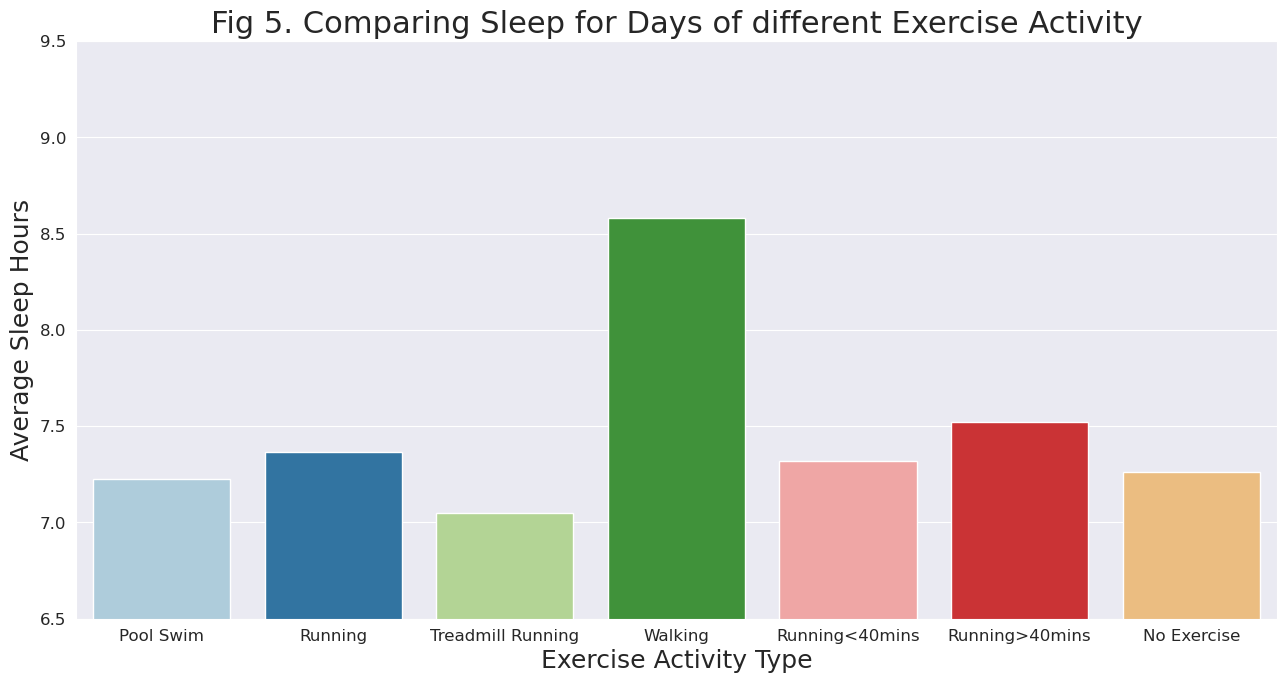

In [463]:
#Create a figure and axes
fig, axs = plt.subplots()
fig.set_size_inches(15.5, 7.5)
sns.set_palette("Paired")

#Make Plot
sp1 = sns.barplot(x='Activity Type', y='av_sleep', data = avslp_acts, hue='Activity Type', legend=False)
sp1 = sp1.set(ylim=(6.5,9.5))

#Customise and show
plt.title("Fig 5. Comparing Sleep for Days of different Exercise Activity", fontsize=22)
plt.xlabel("Exercise Activity Type", fontsize=18)
plt.ylabel("Average Sleep Hours", fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

While we see that walking is the clear winner, it can also be seen above that only two walks were recorded during the two year period of this analysis but it is interesting to note that the two days I recorded walks were on hikes when on a holiday, which are periods of low stress. Therefore we cannot conclusively say that this activity leads to greater sleep at night. We can, however, conclude that longer runs greater than 40 minutes (7.5 hrs) did lead to a slightly longer sleep than shorter runs of less than 40 minutes (7.34 hrs) as the sample is much higher (259 runs).

**Although this is useful knowledge, it still hasn't revealed a clear indicator of how I can sleep longer at night. Let's delve into some other factors and find out if there's anything else that might shed light onto what leads to longer sleep.**

### Q4. What Activity and Health Factors during the day lead to a longer sleep?

Now time to delve into the metrics data to find out if we can find trends during the day that lead to greater sleep.

Let's look at 6 main factors that larger quantities in the day, should lead to longer sleep in the night:
- Highly Active Time per day (sec)
- Number of Steps
- Energy used (kcal)
- Total Distance per day(m)
- Number of Floors Ascended
- Max HR Average

Lets put each of these on scatter graphs against sleep to see if there's any correlation between these factors. We would expect to see a correlation up and to the right, signalling that more of these during the day lead to a greater sleep on that night (i.e. more steps during the day lead to more sleep that corresponding night).

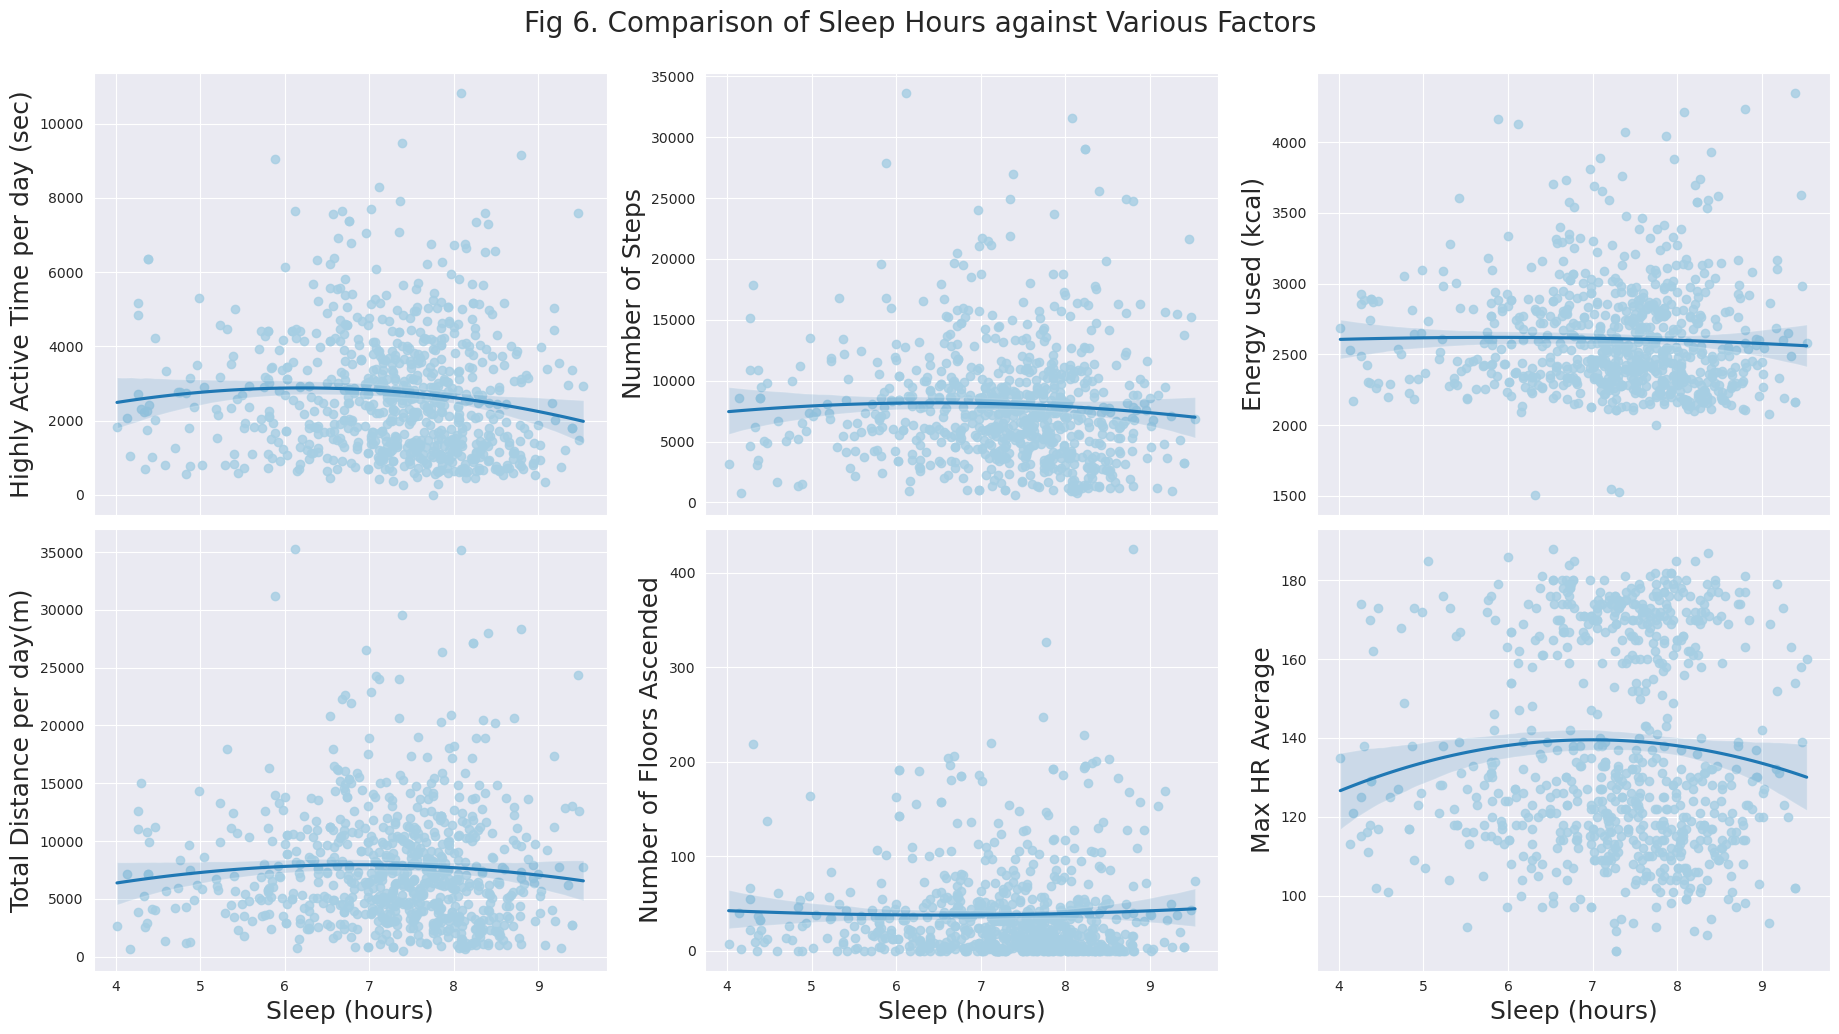

In [464]:
# Set figure and axes
fig, axs = plt.subplots(2, 3, sharex='col')
fig.set_size_inches(18.5, 10.5)

# Define y variables for plotting
y_vars = ['highlyActiveSeconds', 'totalSteps', 'totalKilocalories','totalDistanceMeters', 'floorsAscendedInMeters', 'maxAvgHeartRate']

# Define y axis labels
y_labels = ["Highly Active Time per day (sec)", "Number of Steps","Energy used (kcal)", "Total Distance per day(m)","Number of Floors Ascended", "Max HR Average"]

# Make a graph for each one of the grids
for ax, y_var, y_label in zip(axs.flatten(), y_vars, y_labels):
    sns.regplot(ax=ax, x='total_sleep_hourdec', y=y_var, data=slp_met_act, line_kws={'color': 'C1'}, order=2)
    ax.set_ylabel(y_label, fontsize=18)

# Set common x-axis label for the bottom row and adjust the layout
for ax in axs[1, :]:
    ax.set_xlabel("Sleep (hours)", fontsize=18)

# Remove the x-axis label for the top row
for ax in axs[0, :]:
    ax.set_xlabel("")

# Finalise and show
fig.tight_layout()
fig.subplots_adjust(top=0.92)
fig.suptitle('Fig 6. Comparison of Sleep Hours against Various Factors', fontsize=20)
plt.show()

**Interesting, we didn't get any correlation between longer sleep and these health factors.**

But now let's go deeper into these factors. We often associate sleep with lopnger periods than one single day, in fact, we normally have a good week or even month of sleep when we get into good habits over this period, rather than doing something right on one singular day. 

So, lets look at monthly trends, a 30 day rolling average for each of these factors and compare that to our 30 day rolling sleep average to see if habits sustained over a 30 day period leads to a longer sleep. We will calculate these rolling averages and put these into the same scatter graphs as above to see what we find.

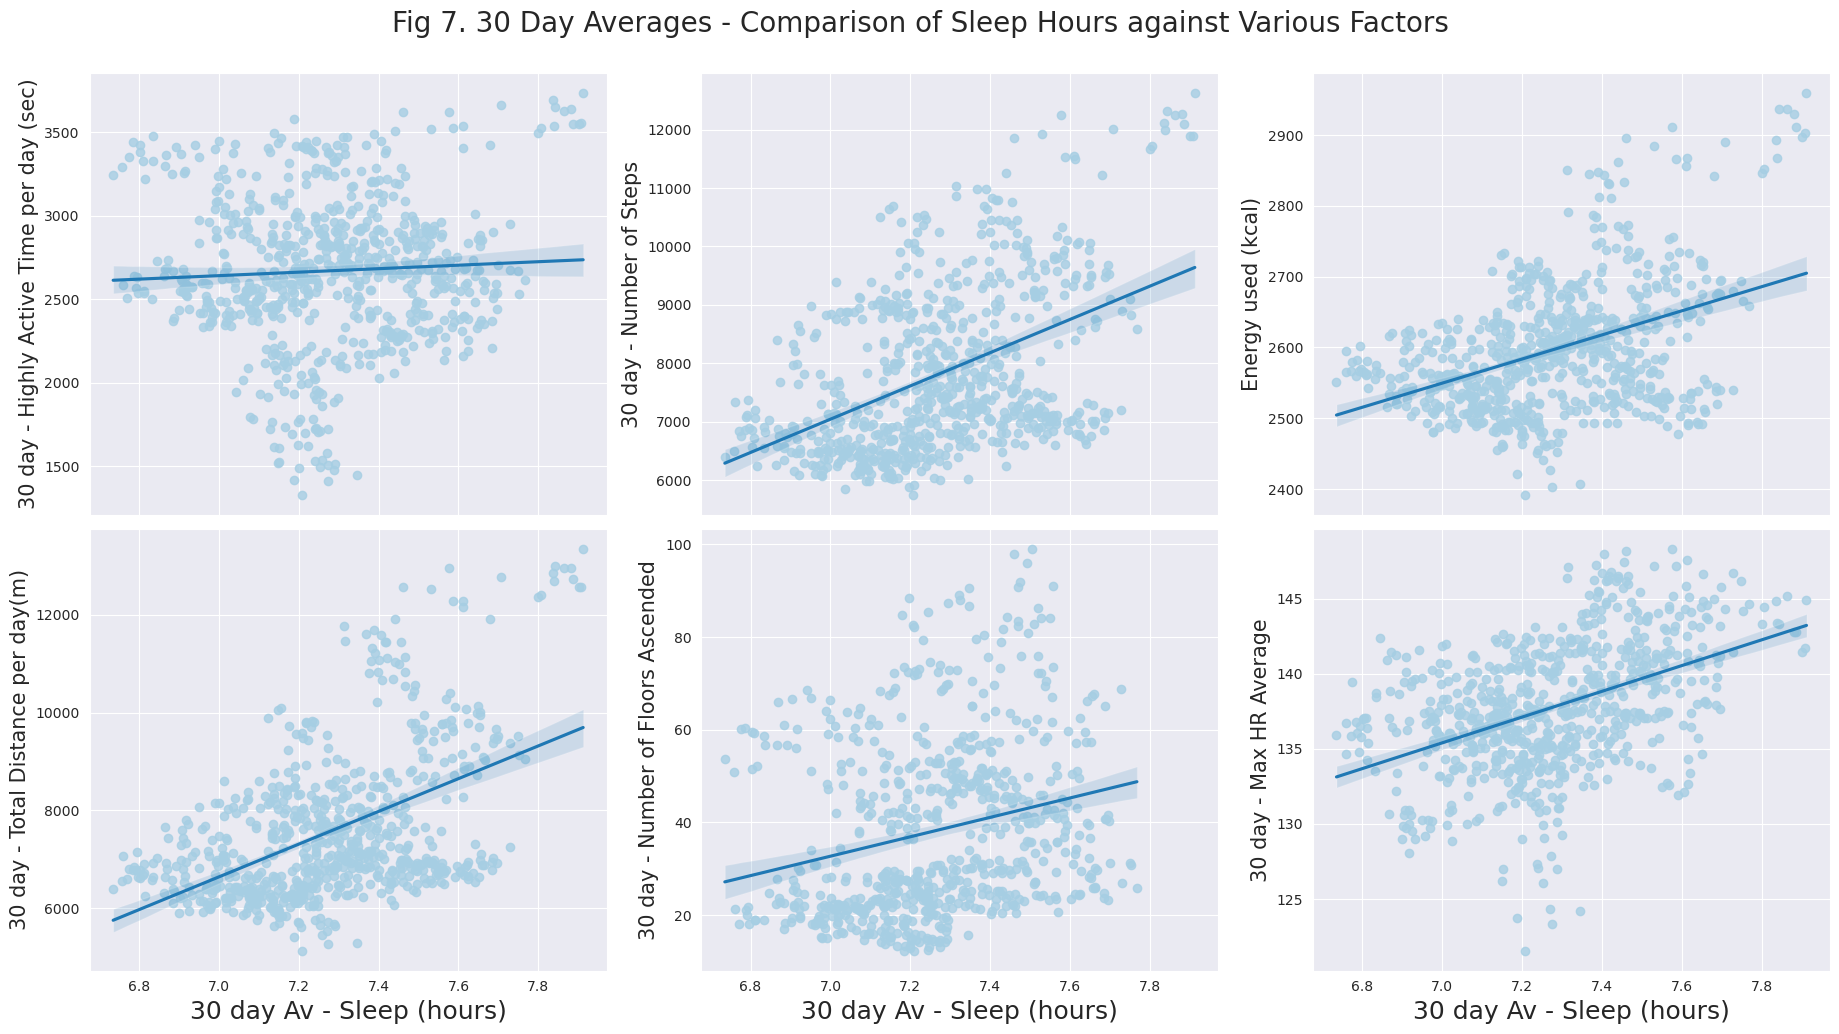

In [465]:
# Set figure and axes
fig, axs = plt.subplots(2, 3, sharex='col')
fig.set_size_inches(18.5, 10.5)

slp_met_act['maxHeartRate'] = pd.to_numeric(slp_met_act['maxHeartRate'], errors='coerce')
slp_met_act['Distance'] = pd.to_numeric(slp_met_act['Distance'], errors='coerce').fillna(0)

# Find Rolling Averages and add to the data frame
metrics = ['highlyActiveSeconds','totalSteps','totalKilocalories','totalDistanceMeters','floorsAscendedInMeters','maxAvgHeartRate']
for metric in metrics:
    slp_met_act[f'{metric}_30day'] = slp_met_act[metric].rolling(window=30).mean()


# Define y variables for plotting
y_vars = ['highlyActiveSeconds_30day', 'totalSteps_30day', 'totalKilocalories_30day','totalDistanceMeters_30day', 'floorsAscendedInMeters_30day', 'maxAvgHeartRate_30day']

# Define y axis labels
y_labels = ["30 day - Highly Active Time per day (sec)", "30 day - Number of Steps","Energy used (kcal)", "30 day - Total Distance per day(m)","30 day - Number of Floors Ascended", "30 day - Max HR Average"]

# Make a graph for each one of the grids
for ax, y_var, y_label in zip(axs.flatten(), y_vars, y_labels):
    sns.regplot(ax=ax, x='rolling_sleep_average_30day', y=y_var, data=slp_met_act, line_kws={'color': 'C1'})
    ax.set_ylabel(y_label, fontsize=15)

# Set common x-axis label for the bottom row and adjust the layout
for ax in axs[1, :]:
    ax.set_xlabel("30 day Av - Sleep (hours)", fontsize=18)

# Remove the x-axis label for the top row
for ax in axs[0, :]:
    ax.set_xlabel("")

# Finalise and show
fig.tight_layout()
fig.subplots_adjust(top=0.92)
fig.suptitle('Fig 7. 30 Day Averages - Comparison of Sleep Hours against Various Factors', fontsize=20)
plt.show()

**EUREKA!** There it is. What an important finding. So it's not what I do on one singular day that determines whether I sleep longer, it's building up good habits over time.**

**So what this tells me is, if I build up good, sustained active habits over time, it will lead to longer sleep on average over time. This is extremely useful to know. I shouldn't necessarily expect to sleep significantly better on a night that I did a large run that day, but if I am consistently exercising, staying active and getting my heart rate up over a sustained longer period of time, I will sleep better as a whole!**

In fact, we find based on the analysis that if I were to move an average of ~9km distance and take ~9,000 steps per day over a sustained 30-day period, I can expect to raise my average sleep per night to about 7.8 hrs, far exceeding my current average of ~7.3 hrs per night. While that sounds like a lot it is certainly achievable!

### **Q5. Does lower Stress contribute to longer sleep too?**

Ok, so we've found the first important finding in what leads to longer sleep but another factor that might contribute to how well I sleep is stress.

Returning to Fig. 1, I could note periods of sustained longer sleep and shorter sleep based on the 30 day rolling average. Whilst this is not a perfect method to determine this, a few points jumped out at me:

- There were noticable peaks of longer sustained sleep around December and January for both years on records. These are periods of lower stress for me as I take time off to spend with family and friends and don't work...
- There was also two noticeable troughs, one around May/June 2021 ( a particularly stressful time in my life for personal reasons) and October/November 2021, a particularly stressful time as a started a new job in a cxmpletely new industry.

So this alone tells me that stress is likely to correlate with longer sleep, but lets see what the Garmin data tells us...

Garmin stress tracking is based on a well-established and scientifically validated understanding of your autonomic nervous system (ANS). Basically, the stress level feature determines a level of stress based on the wearer's heart-rate variability. (Garmin, 2024). We will use the stress level tracking to determin whether days of higher stress lead to shorter sleep, and vice versa. We will again use a 30 day rtolling average, as we've established a longer sustained habit is what leads to greater average sleep over this time period, so we will use the same method for stress tracking.

Unfortunately, the stress data is tied up in a dictionary within the table so I will first need to unnest this, rejoin it and then complete the analysis.

In [466]:
#Function to extract the stress data from the dataframe
def extract_awake_with_date(row):
    # Extract the calendarDate and the aggregatorList
    calendar_date = row['allDayStress']['calendarDate']
    aggregator_list = row['allDayStress']['aggregatorList']
    # Extract the 'AWAKE' data
    awake_data = next((item for item in aggregator_list if item['type'] == 'AWAKE'), {})
    awake_data['calendarDate'] = calendar_date  # Add calendarDate to the dictionary
    return awake_data

# Apply the function to each row in the DataFrame
awake_details_with_date = slp_met_act.apply(lambda row: extract_awake_with_date(row), axis=1)
awake_df_with_date = pd.json_normalize(awake_details_with_date)

# Now awake_df_with_date includes 'calendarDate' which can be used for joining
for col in awake_df_with_date.columns:
    if col != 'calendarDate':
        awake_df_with_date = awake_df_with_date.rename(columns={col: 'AWAKE_' + col})

# Join this DataFrame back to the original DataFrame based on the date columns
slp_met_act['date'] = pd.to_datetime(slp_met_act['date'])
awake_df_with_date['calendarDate'] = pd.to_datetime(awake_df_with_date['calendarDate'])

# Join on 'date' column of slp_met_act and 'calendarDate' of awake_df_with_date
slp_met_act = pd.merge(slp_met_act, awake_df_with_date, left_on='date', right_on='calendarDate', how='left')

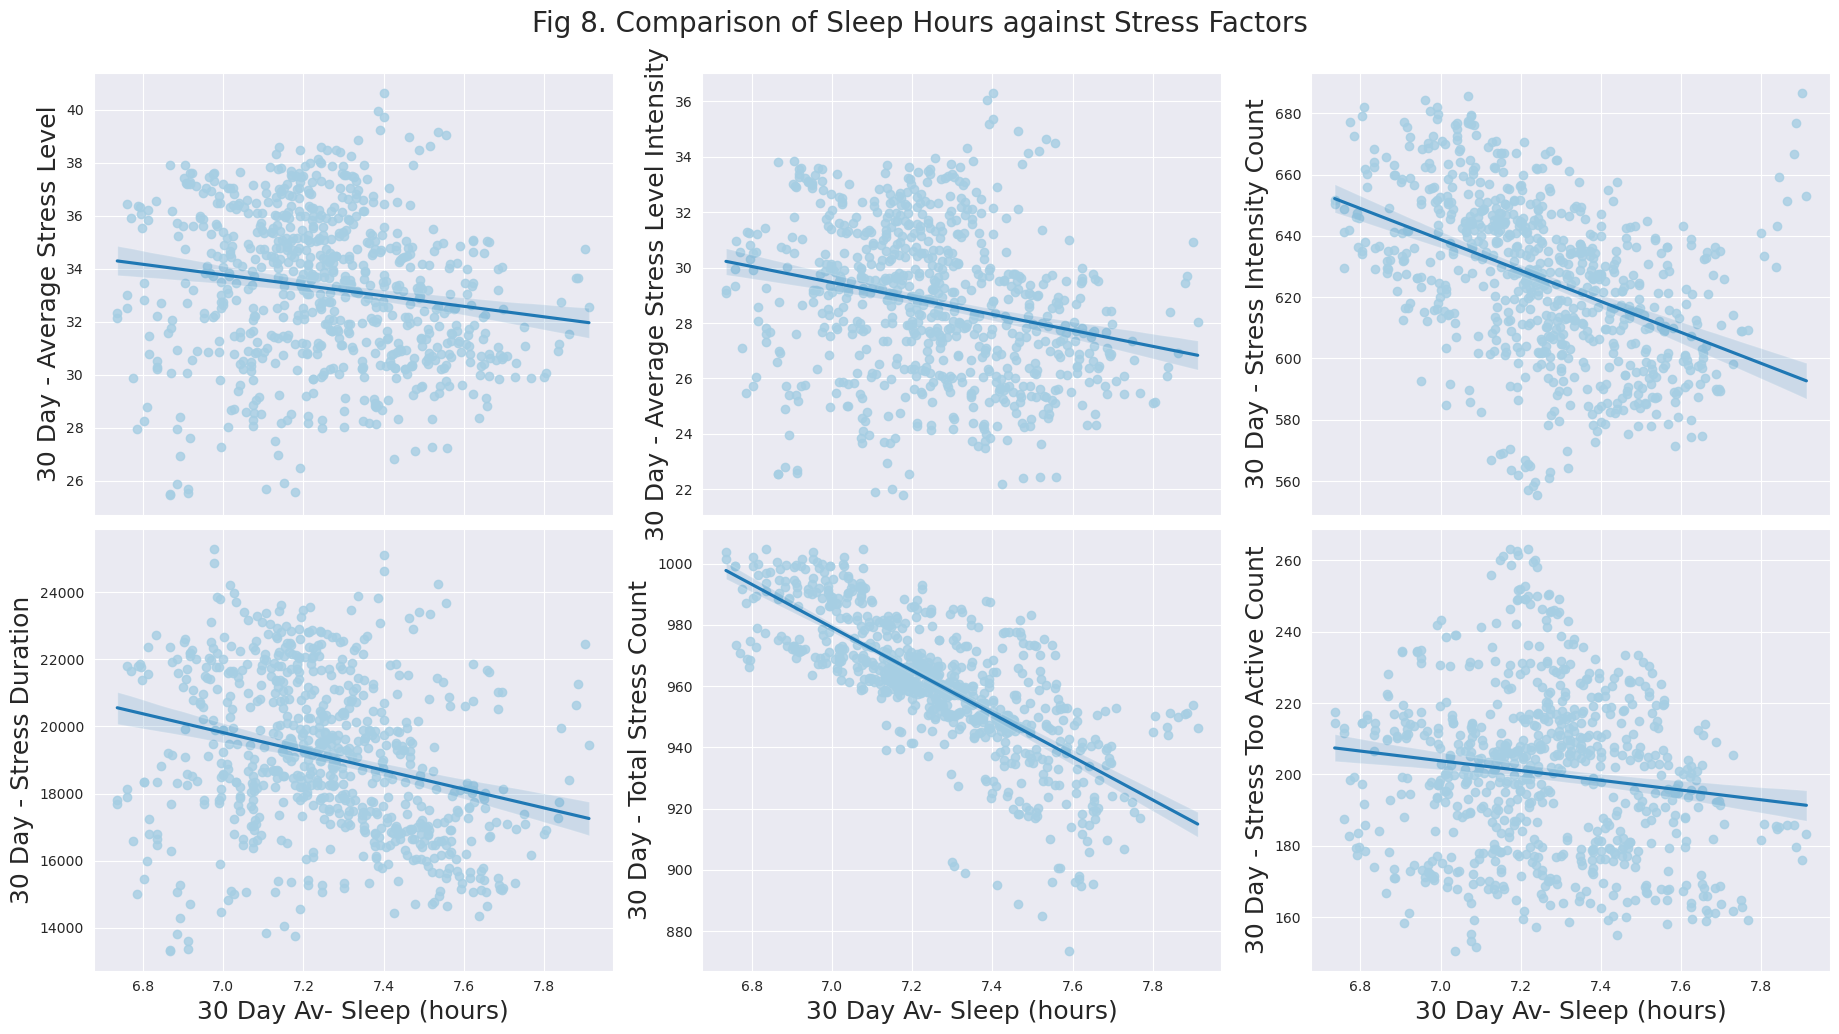

In [467]:
# Set figure and axes
fig, axs = plt.subplots(2, 3, sharex='col')
fig.set_size_inches(18.5, 10.5)

metrics = ['AWAKE_averageStressLevel', 'AWAKE_averageStressLevelIntensity', 'AWAKE_stressIntensityCount','AWAKE_stressDuration', 'AWAKE_totalStressCount', 'AWAKE_stressTooActiveCount']
for metric in metrics:
    slp_met_act[f'{metric}_30day'] = slp_met_act[metric].rolling(window=30).mean()

# Define y variables for plotting
y_vars = ['AWAKE_averageStressLevel_30day', 'AWAKE_averageStressLevelIntensity_30day', 'AWAKE_stressIntensityCount_30day','AWAKE_stressDuration_30day', 'AWAKE_totalStressCount_30day', 'AWAKE_stressTooActiveCount_30day']

# Define y axis labels
y_labels = ['30 Day - Average Stress Level', '30 Day - Average Stress Level Intensity', '30 Day - Stress Intensity Count','30 Day - Stress Duration', '30 Day - Total Stress Count', '30 Day - Stress Too Active Count']

# Make a graph for each one of the grids
for ax, y_var, y_label in zip(axs.flatten(), y_vars, y_labels):
    sns.regplot(ax=ax, x='rolling_sleep_average_30day', y=y_var, data=slp_met_act, line_kws={'color': 'C1'})
    ax.set_ylabel(y_label, fontsize=18)

# Set common x-axis label for the bottom row and adjust the layout
for ax in axs[1, :]:
    ax.set_xlabel("30 Day Av- Sleep (hours)", fontsize=18)

# Remove the x-axis label for the top row
for ax in axs[0, :]:
    ax.set_xlabel("")

# Finalise and show
fig.tight_layout()
fig.subplots_adjust(top=0.92)
fig.suptitle('Fig 8. Comparison of Sleep Hours against Stress Factors', fontsize=20)
plt.show()

**There it is, Fig. 8 is another clear indicator of what leads to longer sleep. This tells us that sustained periods (of 30 days) of higher stress lead to sustained periods of shorter sleep on average. Likewise, sustained periods of low stress lead to longer sleep!**

Now, just to see if it is clear, on Fig 9. below, I will plot Average Stress Level (30 day average) along side average sleep, 30 day average just to see if my suspicions about those periods I identified above were correct.

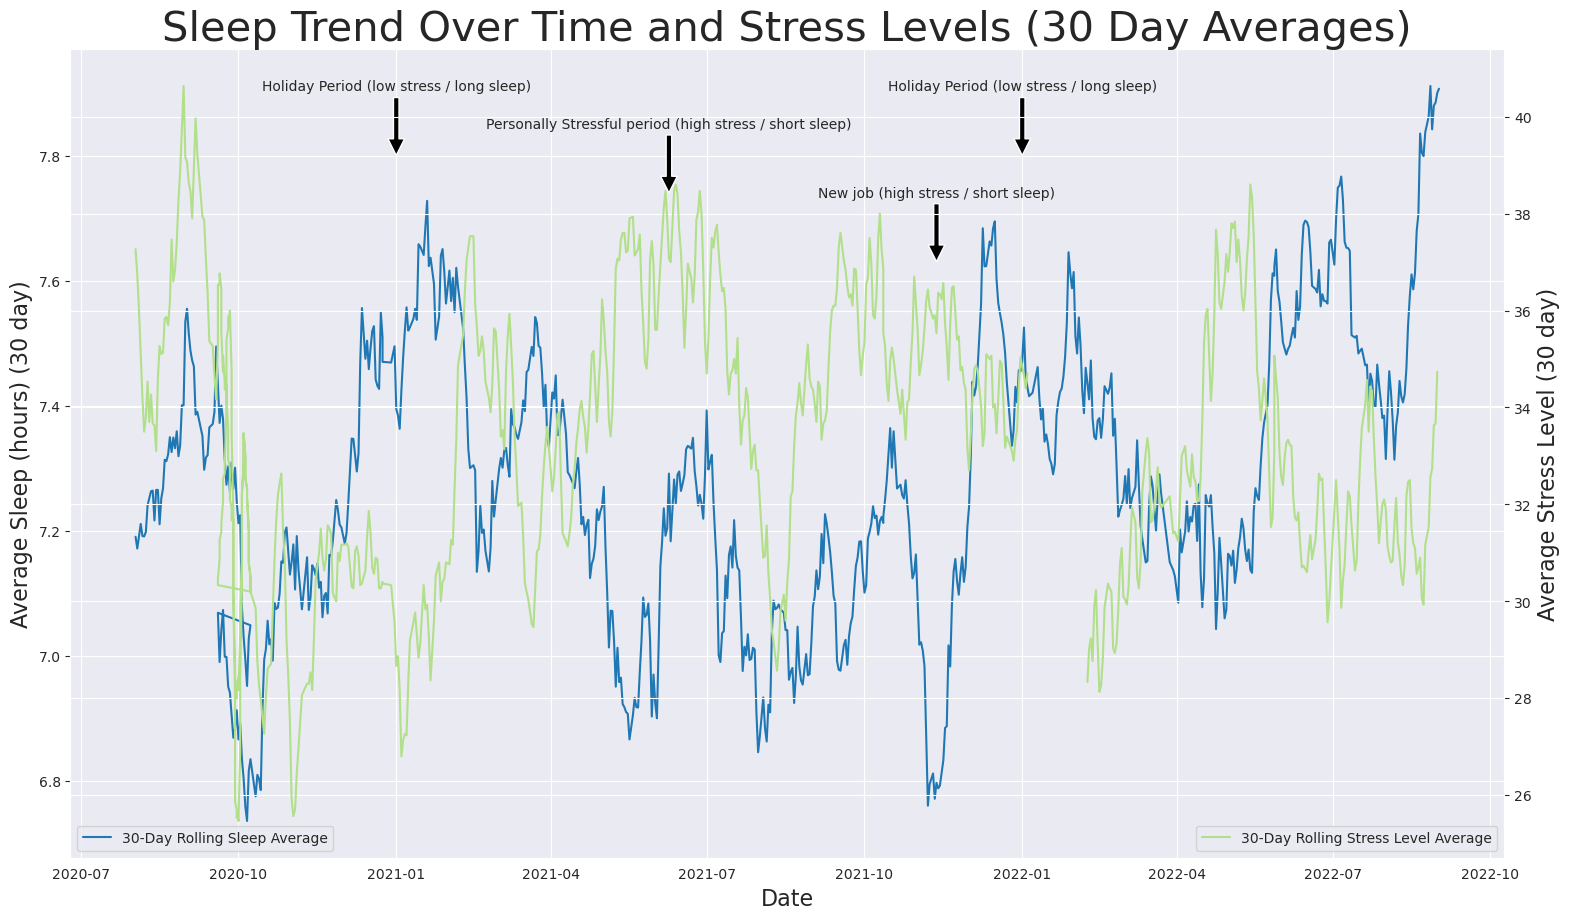

In [468]:
# Ensure the column contains numeric values
slp_met_act['maxHeartRate'] = pd.to_numeric(slp_met_act['maxHeartRate'], errors='coerce')
slp_met_act['Distance'] = pd.to_numeric(slp_met_act['Distance'], errors='coerce').fillna(0)

sns.set_palette("Paired")
sns.set_style("darkgrid")

# Find Rolling Averages and add to the data frame
slp_met_act['rolling_maxHR_average_30day'] = slp_met_act['maxHeartRate'].rolling(window=30).mean()
slp_met_act['rolling_StressLevel_average_30day'] = slp_met_act['AWAKE_averageStressLevel'].rolling(window=30).mean()
slp_met_act['rolling_distance_sum_7day'] = slp_met_act['Distance'].rolling(window=7).sum()

# Rolling Sleep Plot - set figure and axes
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

# ax1 - Sleep and Rolling sleep average
# ax.plot(slp_met_act['date'], slp_met_act['total_sleep_hourdec'], label='Daily Sleep')
ax.plot(slp_met_act['date'], slp_met_act['rolling_sleep_average_30day'], label='30-Day Rolling Sleep Average', color="C1")
ax.legend(loc=3)
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('Average Sleep (hours) (30 day)', fontsize=16)

# ax3
ax3 = ax.twinx()
ax3.plot(slp_met_act['date'], slp_met_act['rolling_StressLevel_average_30day'], label='30-Day Rolling Stress Level Average', color="C2")
ax3.set_ylabel('Average Stress Level (30 day)', fontsize=16)
ax3.legend(loc=4)

# Annotations
# You need to provide actual dates and values for x, y
annotations = [
    ("Holiday Period (low stress / long sleep)", "2021-01-01", 7.8),
    ("Holiday Period (low stress / long sleep)", "2022-01-01", 7.8),
    ("New job (high stress / short sleep)", "2021-11-12", 7.63),
    ("Personally Stressful period (high stress / short sleep)", "2021-06-09", 7.74)
]
for text, x, y in annotations:
    ax.annotate(text, xy=(pd.Timestamp(x), y), xytext=(pd.Timestamp(x), y+0.1),
                arrowprops=dict(facecolor='black', shrink=0.01),
                ha='center', va='bottom')

# Finalize and show plot
plt.title('Sleep Trend Over Time and Stress Levels (30 Day Averages)', fontsize=30)
plt.show()


Yes, It can be seen:
- December/January for both years: Not working, time with friends and family = Lower average stress level and longer average sleep.
- May/June 2021 & October/November 2021: Stressful times in my life = higher stress levels and shorter average sleep.

## 4. Conclusions and Discussion
The primary purpose of this analysis was to explore whether any activities or health statistics tracked by my Garmin watch can be used to contribute to better sleep quality. For the purpose of this analysis, sleep quality is simply measured by total time asleep per night.

I used my detailed health data as supplied from the Garmin website based on my wearing of the Garmin watch everyday and night for a slightly more than 2 years from July 2021 to September 2023.

A number of questions were answered to identify the below findings:

- Higher active days where excercise was completed, especially excercise which resulted in a higher heart rate (>170 bpm), led to a slight increase in sleep duration (7.39 hours on average for days with recorded excercise compared to 7.26 hourse for days without recorded excercise).
- However, what led to the highest increase in sleep quality was a sustained, habitual period of larger activity and excercise. There was a far greater correlation between 30 day averages of higher sustained activity and 30 day average sleep duration over the same period.
- In fact, we find based on the analysis that if I were to move an average of ~9km distance and take ~9,000 steps per day over a sustained 30-day period, I can expect to raise my average sleep per night to about 7.8 hrs, far exceeding my current average of ~7.3 hrs per night. While that sounds like a lot it is certainly achievable!
- Likewise, a sustained, habitual period of lower stress levels over a 30 day period saw a far greater correlation to longer 30 day average sleep duration.

**The Golden Takeaway:** 

**Building up sustained habits of consistent activity and low stress over time, will lead to greater sleep on average. One shouldn't necessarily expect to sleep significantly better on a night after a large amount of exercise was performed during the day. However, if one consistently exercises, stays active, gets their heart rate up and keeps stress levels low over a sustained longer period of time (weeks, months, longer the better), one can expect to start sleeping better soon!**

Ok, so now we know what leads to better sleep... let's go put this into practice and improve our sleep!

## 5. Future Analysis
- Given this analysis was performed for a 2 year period using a Garmin watch, it would be best to do a longer study over more years.
- Additionally, I have since purchased an Oura ring in 2023 which is known to track sleep even more accurately than a sleep wrist watch and it calculates an overall sleep score which accounts for a number of other factors other than sleep duration alone. Using this superior technology and sleep score to analyse my sleep and health data may lead to more accurate and potentially more useful findings to help improve my sleep.
- There are a number of other factors that can affect one's sleep quality. One that I find particularly prevalent in 2024 is screen time. Given that smart phone's track this, it is possible that I could obtain my screen time data for each data and do analysis of whether increased screen time, especially later at night, closer to bed time, shows an affect on sleep quality.
- Another factor that can affect sleep is diet. If I were to track my eating habits closely in the future, an additional analysis including this factor might be useful.

## 6. References

Kwon, C. (2023). *Research and Public Interest in Mindfulness in the COVID-19 and Post-COVID-19 Era: A Bibliometric and Google Trends Analysis.* [online] National Library of Medicine. Available at: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10000852/ [Accessed 6 Apr. 2024].


Walker, M. (2018). *Why We Sleep*. Harlow, England: Penguin Books.


NIH (2022). *How Much Sleep Is Enough?* [online] National Heart, Lung and Blood Institute (NIH). Available at: https://www.nhlbi.nih.gov/health/sleep/how-much-sleep#:~:text=Experts%20recommend%20that%20adults%20sleep,or%20more%20hours%20a%20night. [Accessed 7 Apr. 2024].


WHO (2022). *Physical activity* [online] World Health Organisation (WHO). Available at: https://www.who.int/news-room/fact-sheets/detail/physical-activity#:~:text=should%20do%20at%20least%20an,least%203%20days%20a%20week. [Accessed 7 Apr. 2024].


(2024). *Collection of personal Garmin health Data*. [online] Garmin. Available at: https://support.garmin.com/en-US/?faq=W1TvTPW8JZ6LfJSfK512Q8 [Accessed 2 Apr. 2024].


(2024). *STRESS TRACKING (Garmin)*. [online] Garmin. Available at: https://www.garmin.com/en-US/garmin-technology/health-science/stress-tracking/ [Accessed 2 Apr. 2024].